# Fluid Kinematics


## Learning Outcomes

This Jupyter Notebook will introduce ideas related to how fluid motion can be described mathematically. These are very important tools that let engineers build systems and machines that involve fluid flow. Examples are vehicles of all kinds, pumps and engines, weather simulations, domestic plumbing systems and medical implants.

The following concepts will be discussed in detail:

* Velocity fields
* Eulerian and Lagrangian descriptions of fluid motion.
* Streamlines, pathlines, and streaklines

Most of you should be familiar with the idea of a vector field already but it's always a good idea to take a fresh look. Concepts such as Eulerian and Lagrangian descriptions might seem abstract at first but they are important ideas in taming the complex nature of fluid flow which allows us to work as engineers. In the next notebook we will look at the Reynolds Transport Theorem, which will allow us to move from the Lagrangian to the Eulerian description. As you will see this will make analysis of many flows much easier.

You will no doubt have heard the term 'streamlined' before and perhaps have a feeling for what it means. It might be along the lines that a race car is streamlined while a bus or a lorry is not. Here we will describe what streamlines mean mathematically and also introduce the related ideas of pathlines and streaklines and how we can use them to describe fluid flow.

## Vector fields

Let take a step back from this complexity and deal with some of the basics.

Take a look at the weather map of Ireland below. Each icon on this map is fixed in space (longitude and latitude) and the pointy end indicates the direction of the wind. The numeric value indicates the speed of the wind. Therefore the icon gives us the local *velocity vector*. A field of these vectors arranged over a space is a vector field.

<img src="media/3.1/metie.png" alt="Simple Vector Field" width="350" title="A simple vector field in the form of a weather forecast, source met.ie" />
<center>A simple vector field in the form of a weather forecast, source [met.ie](https://www.met.ie)</center>

To implement this mathematically we first need to define the positions of the vectors in our space.
We can define a field of coordinates in 3D ($\mathbb{R}^3$) space as $\vec{x}(x,y,z)$; a series of vectors each of which point from the origin to a point $(x,y,z)$. Note these are vectors that simply point to positions in space and are not velocity vectors. 

We can write these position vectors using the idea of unit vector notation where $(\hat{i},\hat{j},\hat{k} )$ are, as the name implies, unit length vectors along the axes of the coordinate system. They can then be multiplied by scalers to transform them to any point in $\mathbb{R}^3$. We can write this as follows:

\begin{align}
\vec{{x}} (x,y,z) = x \hat{i} + y \hat{j} + z \hat{k}
\end{align}

So as we change the values of $x$, $y$ or $z$ we can control where the transformed unit vector points.

Lets look at an interactive example in 2D or $\mathbb{R}^2$.

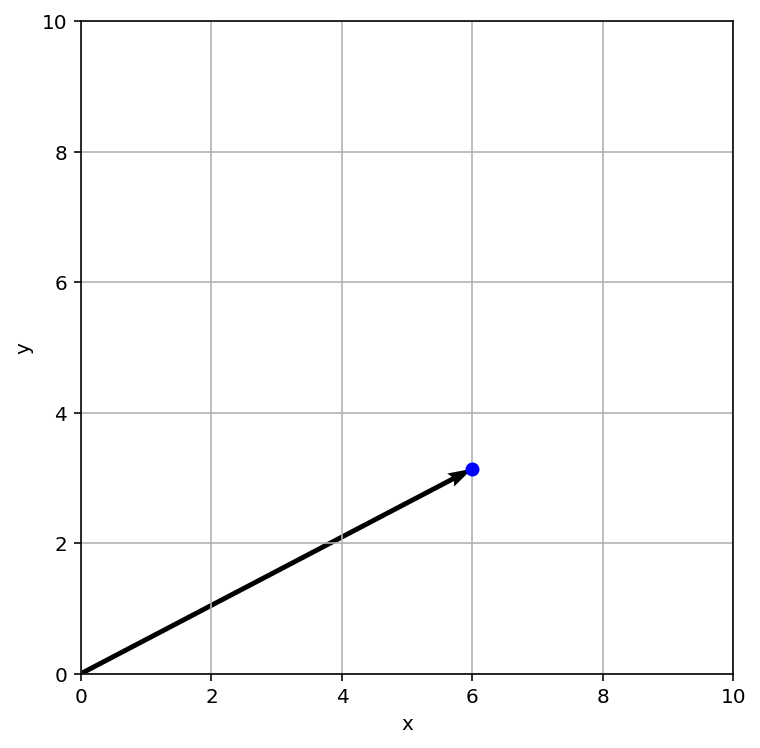

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# The first thing we need to do is select the values of our scalers x and y that determine where our point in space is.
x = 6 # Edit this number to any value between 0 and 10 for x
y = np.pi # Edit this number to any value between 0 and 10 for x

# Now lets make a plot to draw on
fig, ax = plt.subplots(figsize=(6,6))

# Plot the (x,y) location as a blue circle
ax.plot(x,y,'bo')
# Draw an arrow from the origin to the point (x,y) using the quiver command: ax.quiver(x, y)
# Note the extra code to control the lenght of the arrow. 
ax.quiver(x, y, scale_units='xy', scale=1)

# This just sets the upper and lower limits on the plot from 0 to 10.
plt.xlim([0, 10])
plt.ylim([0, 10])

# Add text labels to the axes
plt.xlabel("x")
plt.ylabel("y")

# Draw gridlines
plt.grid()

# Fix the plot aspect ratio
ax.set_aspect('equal')

# Finally display the plot below
plt.show()

We now have a way to select any point in space using unit vector notation. This gives us location to put our wind vectors as in the map above. What about the velocity at each point? Do to this we need to define a vector $\vec{V}$ that is a function of every point $\vec{x}$ but also for time $t$ since the wind can change over the course of the day as well as from location to location. This looks like:

\begin{align*}
\vec{V}(\vec{x},t) = u \hat{i} + v \hat{j} + w \hat{k}
\end{align*}

Note that now we have new scalers $(u,v,w)$ These are the velocity components along each axis of the coordinate system. So at some point $\vec{x}$ and time $t$ we have a velocity $\vec{V}$ that has a component $u$ in the $i$ direction, $v$ in the $j$ direction and $w$ in the $k$ direction. 

Lets look at another $\mathbb{R}^2$ example with Python. This time we will define a grid of points.

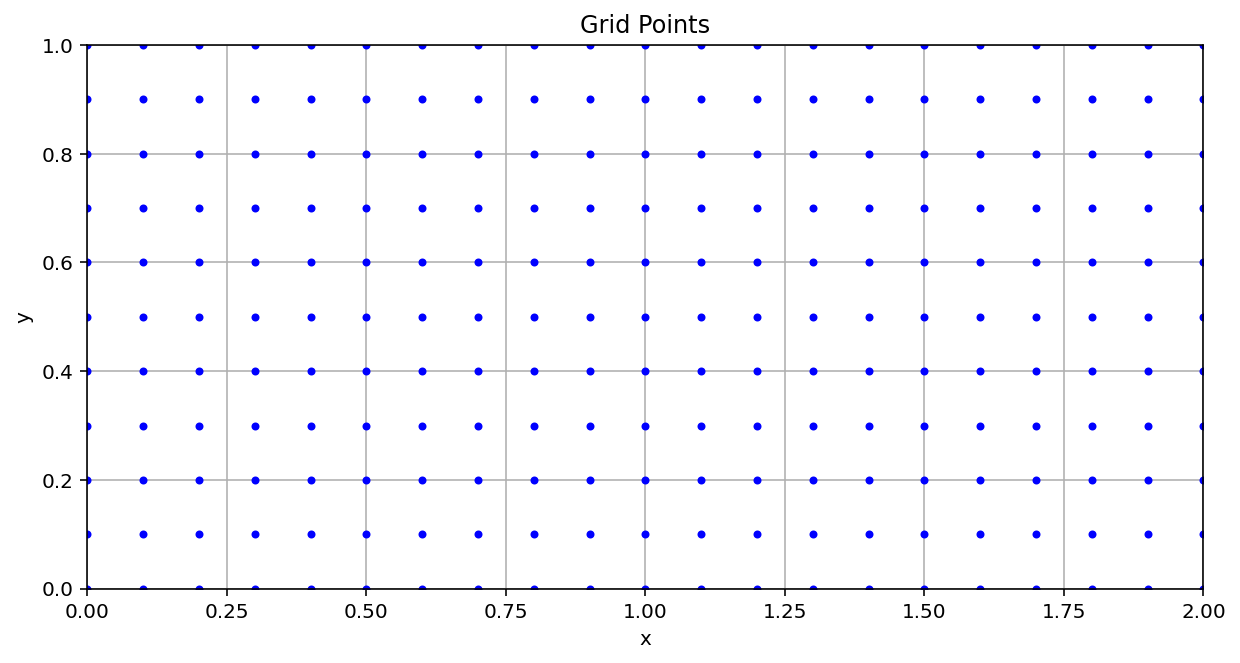

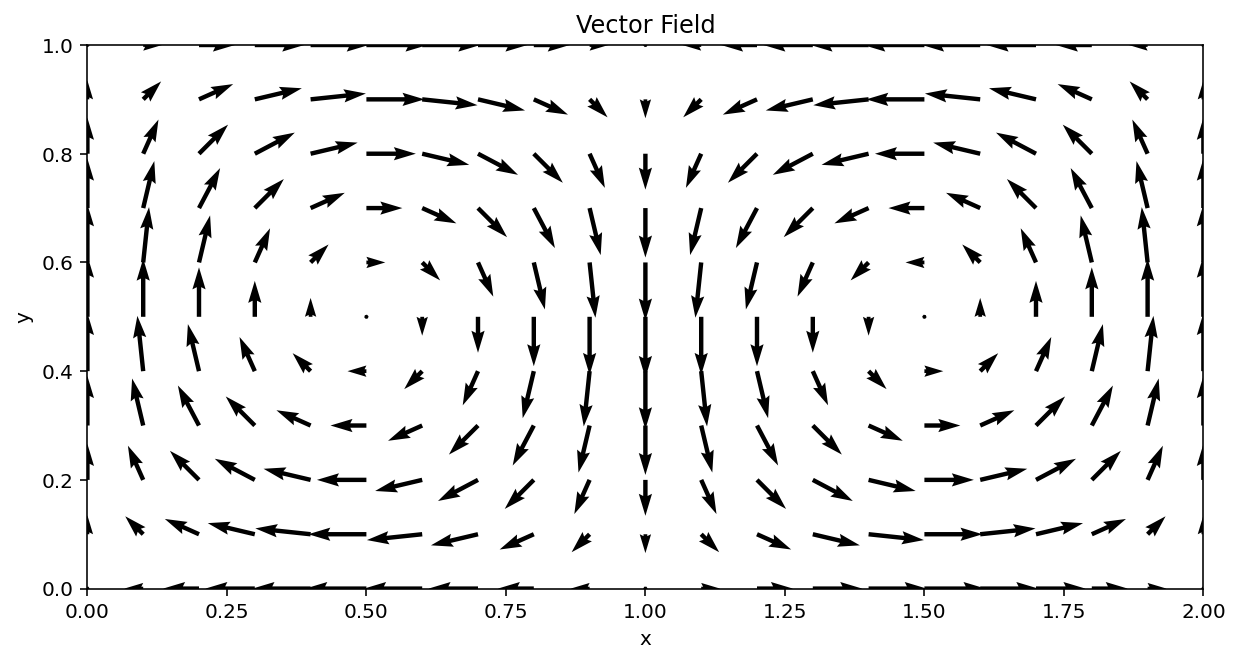

In [15]:
# We've already imported the required libraries, nunpy and matplotlib in the prevous cell.

# Lets start by creating a grid of points (X,Y)

# the np.arrange function simply creates a list of numbers.
# for example:
# np.arange(0,10,2)
# returns:
# array([0, 2, 4, 6, 8])
# we can define a range of points along the x and y axis as follows:
x = np.arange(0, 2.1, 0.1) # from 0 up to 2.1 in steps of 0.125. (note that 2.1 is not included)
y = np.arange(0, 1.1, 0.1)

# However we want a 2D grid of numbers so we can use the command meshgrid to fill it in.
X, Y = np.meshgrid(x, y)

# Create a new figure axes
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot the grid points (X,Y)
ax1.plot(X,Y,'b.')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Grid Points")
ax.set_aspect('equal')
plt.grid()
plt.xlim([0, 2])
plt.ylim([0, 1])
plt.show()

# Now lets define values of local velocity with components u and v for each point (X,Y).
# By using trigonometric relations relative to the values of (X,Y) we can get a nice result.
u = -np.sin(np.pi * X) * np.cos(np.pi * Y)
v =  np.cos(np.pi * X) * np.sin(np.pi * Y)

# Create a new figure
fig, ax2 = plt.subplots(figsize=(10,5))

# Plot the result using the quiver function which is designed to plot vector fields.
ax2.quiver(X, Y, u, v)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Vector Field")
plt.xlim([0, 2])
plt.ylim([0, 1])
ax.set_aspect('equal')


You may have noticed that nowhere in the above example did we use $\hat{i}$ or $\hat{j}$. In fact the tools provided by the matpotlib library handle this for us and we just need to tell it the scalers $(x,y)$ or $(u,v)$.

Here the velocity field is given by the simple expressions:

\begin{align*}
u &= &-\sin(\pi x)  \cos(\pi y)\\
v &= &\cos(\pi x)  \sin(\pi y)
\end{align*}

This results in a double-vortex *flow field* and the flow is observed to swirl around. This is similar to the flow behind an aircraft which we will learn a lot more about in Mechanics of Fluids II.

<img src="media/3.1/wingtipvortex.jpg" alt="Simple Vector Field" width="500" />
<center>*Wing tip vortices trailing a light aircraft, source [NASA Langley Research Center](https://howthingsfly.si.edu/media/wing-tip-vortex)*</center>

So what does all this mean? What do all these arrows tell us? 

If you consider any point in the flow, the vector's length and orientation at that point tells you the speed and direction of the flow at time $t$. Just like the symbols in the weather forecast. You can think of the vector field above as a single frame from a video. If the flow changes in time (what is referred to as unsteady flow) the length and orientation of the vectors will change as the video plays. Note however that the points $(x,y)$ where the tails of the vectors begin will not change.

Lets looks at a simple example of the airplane. The flow over the airplane is 3D and complex but we can look at 2D slices of the flow to get a understanding of what is happening. You can imagine that this 2D slice is following along behind the airplane as it flies with some velocity $\vec{V}$ or the airplane is a model in a wind tunnel. If we only look at the velocity parallel to the plane ($\vec{V}(y,z)$) then we might see a flow pattern as shown. The flow velocity normal to the 2D slice is not considered right now.

<img src="media/3.1/plane.png" alt="Simple Vector Field" width="800" />
<center>*A vector field in a 2D slice located behind an airplane*</center>

Why do this?
There are a number of reasons why we would want to look at fluid flow in this way. One obvious reason is measurement. If we want to measure the flow velocity behind a model in a wind tunnel we could position a probe at various locations in a grid. Similarly we can arrange weather monitoring stations around the country to measure the wind velocity field. We can also measure the temperature and pressure scalar fields too.

This description of the flow as a vector field at fixed points in space is the **Eulerian** description of flow.
Points are fixed in space and the change in some quantity, such as velocity, is tracked at these points as the fluid passes over each point.

### What about time?

It was mentioned above that the velocity field is a function of space and time $\vec{V}(\vec{{}x},t)$. So far we have only considered space and assumed that the flow is steady, or invariant in time. This is often the case in many types of flows, however most flows we observe are not time invariant. The blood flow pulsing in the body is a good example. Lets look again at our Python code for plotting vector maps and introduce some time dependence. This cell will take a few seconds to run because it first has to be recorded into a HTML format. 

In [16]:
# To show the effect of time we need to animate the vector map so import the matplotlib animation library.
from matplotlib import animation
# We can use HTML5 to make a nice embedded video, IPython is just an old name for the Jupyter project.
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,5)) 

# Lets reuse a lot of code
x = np.arange(0, 2.1, 0.125) 
y = np.arange(0, 1.1, 0.1)

X, Y = np.meshgrid(x, y)

u = -np.cos(np.pi * X) * np.cos(np.pi * Y)
v =  np.cos(np.pi * X) * np.sin(np.pi * Y)

ax.plot(X,Y,'bo')
# Note that now we output quiver to an object Q that lets us edit the properties and contents of the plot.
Q = ax.quiver(X, Y, u, v)

plt.xlim([0, 2])
plt.ylim([0, 1])
plt.grid()

# We dont want to plot the vector field but offload it to a HTML video
plt.close()

# def allows us to define a funciton. This is a piece of code we which to reuse again and again.
# in this case we want to contineously update the values of (u,v) as they are modified in time.
# Pay attention to the syntax used. The indenting determines what lines of code are included in the function
def update_quiver(t, Q, X, Y):
    # To make the flow change with time we add a term: 0.5*np.sin(t*0.25)) to perturb the vector field
    u = -np.sin(np.pi * X + 0.5*np.sin(t*0.25)) * np.cos(np.pi * Y)
    v =  np.cos(np.pi * X + 0.5*np.sin(t*0.25)) * np.sin(np.pi * Y)
    Q.set_UVC(u, v)
    return (Q,)


# This code is used to generate the animation
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y), interval=100, blit=True)

# This outputs it to a nifty video player
HTML(anim.to_html5_video())


You can see that each vector starts from each blue dot as before but the direction and length of each is changing in time. The location of the centre of rotation of each swirling vortex is shifting from left to right due to the addition of the extra term in the equation describing the vector field.

## Streamlines

Before we get to the *Lagrangian Description* now is a good time to introduce the idea of streamlines. Streamlines are by definition curves in a vector field that are everywhere tangent to the flow direction. Therefore streamlines can be used to describe the trajectory of fluid particles in the flow field just like vectors. IN fact they are just another way of representing the flow field.

We will look at streamlines in more detail later but for now we can use our Python plotting tools to illustrate the basic idea.

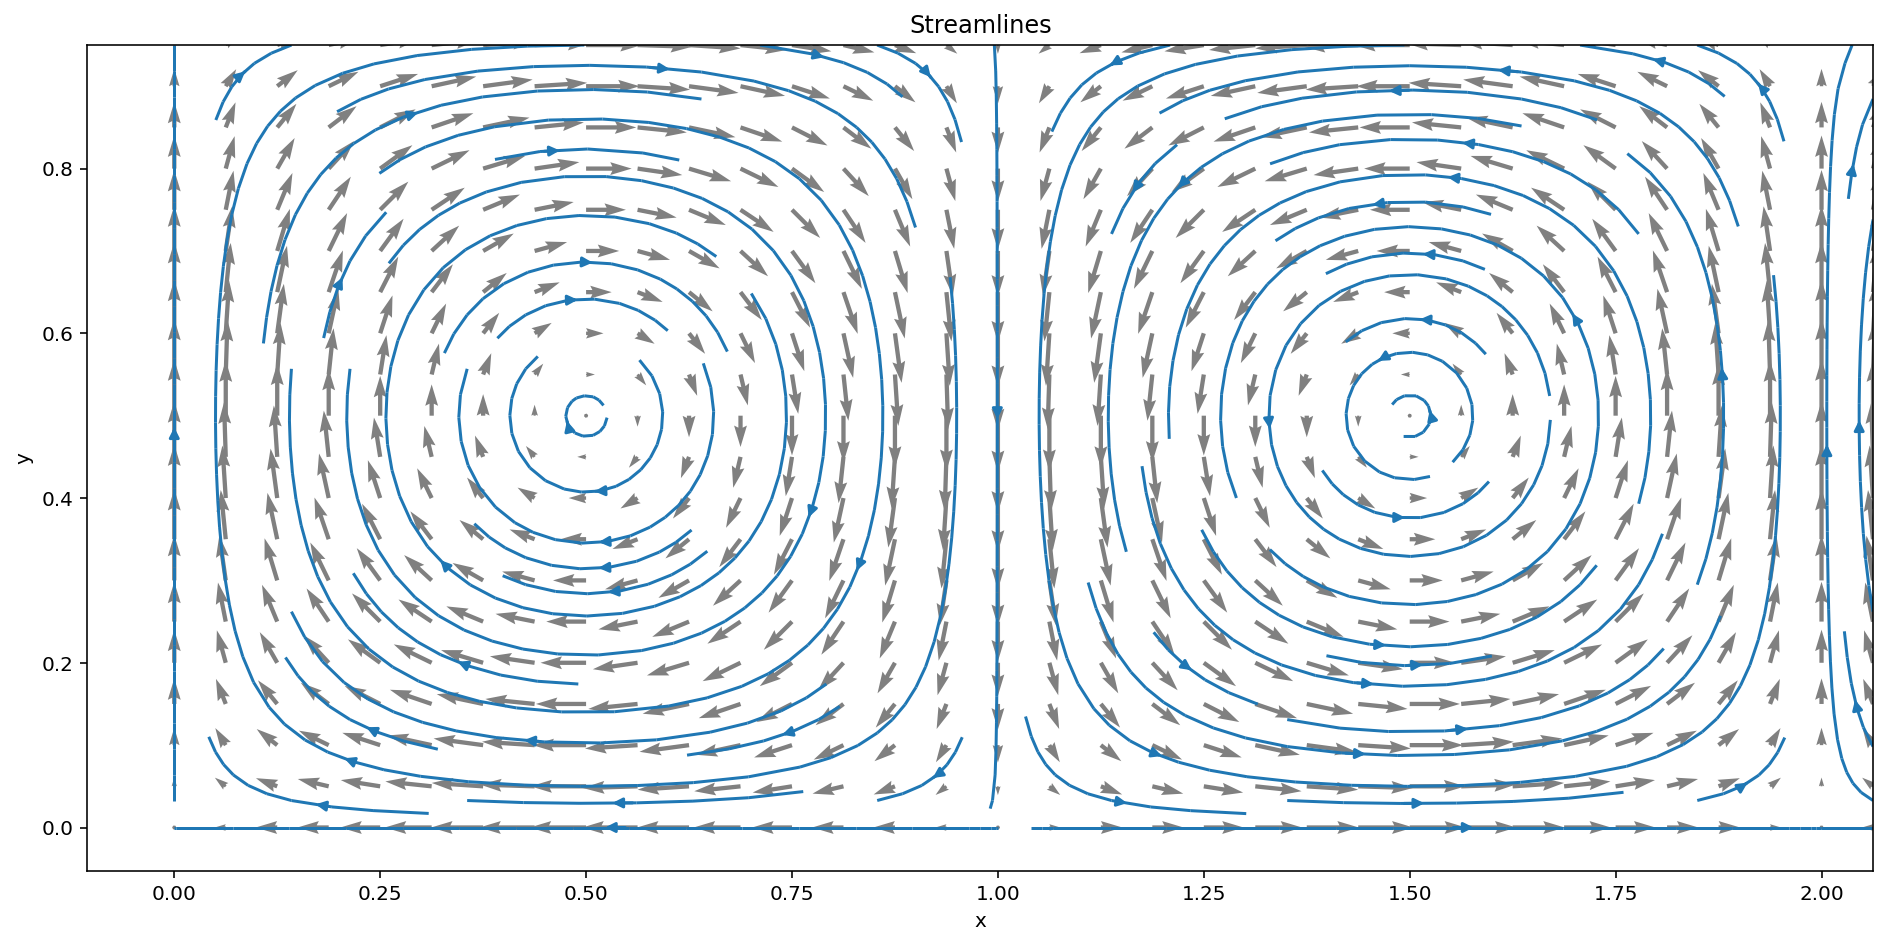

In [17]:
x = np.arange(0, 2.1, 0.125/2) 
y = np.arange(0, 1, 0.1/2)

X, Y = np.meshgrid(x, y)

u = -np.sin(np.pi * X) * np.cos(np.pi * Y)
v =  np.cos(np.pi * X) * np.sin(np.pi * Y)

fig, ax = plt.subplots(figsize=(16,8)) 
ax.quiver(X, Y, u, v, color='gray')

# Plot streamlines
ax.streamplot(X, Y, u, v)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Streamlines")
ax.set_aspect('equal')

## The Lagrangian Description

Now that you have a good idea what the Eulerian description is, lets focus on the Lagrangian description. Consider a swirling 3D fluid flow like that represented by the particles in the following video. 

<video loop controls src="media/3.1/particles_coloured.mp4" width="700" />


It's pretty hard to keep track of all the particles isn't it?

This is the essence of the Lagrangian description! Instead of describing the change in flow velocity at fixed points in a space, the Lagrangian approach tracks individual particles in time and space. 

When working with fluid mechanics problems it is often easier to use the Eulerian description. Later in this course we will derive a theorem that allows us to switch from the Lagrangian to the Eulerian description.

The flow in the above video is independent of time. This might not seem to be the case at first glance however each particle is following a fixed trajectory through space that is independent of the time when the particle was released. A particle released from point $(x_0,y_0,z_0)$ at time $t_0$ will follow the same path that a particle released at any other time $t$.

If you don't believe this have a look at a **long exposure** of the particle motion. As you can see particle traces of different colours overlap as they follow the same trajectory.

<img src="media/3.1/long_exposure.png" alt="particle long exposure" width="1000" />
<center>
A long exposure of the particle trajectory. This is achieved by stacking each frame of the video (modified to reduce particle number and size) computing the entropy of each pixel for all frames.
</center>

Each particle $p$ has a velocity $\vec{V_p}$ and a position $\vec{r_p}$ that is a function of time. The position vector is:

\begin{align*}
\vec{{}r_p}(t) = x_p(t) \hat{i} + y_p(t) \hat{j} + z_p(t) \hat{k}
\end{align*}

and the velocity is just the time rate change of position so:

\begin{align*}
\vec{V_p}\left(\vec{r_p}(t)\right) = \frac{d\vec{r_p}}{dt} = \frac{d\vec{x_p}}{dt} \hat{i} + \frac{d\vec{y_p}}{dt} \hat{j} + \frac{d\vec{z_p}}{dt} \hat{k}
\end{align*}

so that the velocity components are:
\begin{align*}
u_p = \frac{d\vec{x_p}}{dt}, ~ v_p = \frac{d\vec{y_p}}{dt}, \text{and}~  w_p = \frac{d\vec{z_p}}{dt}
\end{align*}

Therefore we can write the velocity as

\begin{align*}
\vec{V_p}\left(\vec{r_p}(t)\right) = u_p \hat{i} + v_p \hat{j} + w_p \hat{k}
\end{align*}

This means we can obtain the velocity at any point in the flow once we know the time and the position.


### Time varying flow

Now lets consider a flow that does vary in time. The velocity is now also a function of position and time, $\vec{V_p}(t,\vec{r_p}(t))$ so that: 

\begin{align*}
\vec{V_p}\left(t,\vec{r_p}(t)\right) = u_p \hat{i} + v_p \hat{j} + w_p \hat{k}
\end{align*}

Whereas the previous flow followed a fixed trajectory in space a time varying flow trajectory can now change. 

The following video shows particles following the streamlines of a flow. The direction of the flow is time dependent as the flow is deflected upwards at a time halfway through the video. This could be due to some object deflecting the flow such as a movable spoiler on the back of a sports car. This now means that we need to be aware of the initial condition that a particle is released into such a flow. A particle released at $t_1$ will follow a different path to one released at $t_2$.


<video loop controls src="media/3.1/time_varying_flow.mp4" width="800" loop=1/>

## Streamlines Revisited

It is clear that streamlines are useful for visualising flow fields. By definition streamlines are just another representation of a vector field allowing us to connect points in the flow with a continuous curve. We can follow a streamline and see where flow will go in a complex geometry such as an engine manifold. We can examine a 3D streamline plot of the flow over an aircraft and look at where the contra rotating vortices we observed above originated. This would be much harder with a 3D vector field because we would not be able to see clear patterns in the flow.

Here is an example of a 3D streamline plot from the freely available open source Computational Fluid Dynamics software *OpenFOAM* showing the flow of the wind around some buildings. Red colours correspond to fast moving flow and blue to low speed flow. Releasing streamlines from various locations upwind of the building shows how the air flow is shaped and diverted. This is an extremely powerful tool in engineering allowing us to understand various factors such as the forces exerted on buildings by wind loading and the distribution of sound and pollution within an urban environment.

<img src="media/3.1/OpenFOAM.png" alt="A CFD simulation" width="1000" />

We can also use streamlines experimentally; in a wind tunnel (or water channel) we can release smoke (or dye) into a flow and watch the movement of these tracers to help us understand the flow. You may have seen exciting videos of *F1* cars in wind tunnels with a stream of smoke moving over the car.

Such approaches lead us to the ideas of **Pathlines** and **Streaklines**, which like streamlines allow us to understand the flow. However there are subtle differences between streamlines, pathlines and streaklines that affect an experiment and so we must take care to understand these.

Now we will use Python and matplotlib to illustrate the ideas of streamlines, pathlines and streakines in some more detail.


In [18]:
# First we will define a function to generate a timer
# Everytime we call this function it will give use the next time step
def data_gen(t=0):
    cnt = 0
    while cnt < 100:
        # Increment cnt and t by 1 and 0.1 respectively
        cnt += 1
        t += 0.01
        yield t


fig, ax = plt.subplots(figsize=(8,8))

x = np.arange(0, 1.5, 0.1) 
y = np.arange(0, 1.5, 0.1)
X, Y = np.meshgrid(x, y)

u = np.ones(X.shape)
v = np.zeros(X.shape)

Q = ax.quiver(X, Y, u, v)

seed_points = np.array([[1.2, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0], [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]])
S = ax.streamplot(X, Y, u, v, start_points=seed_points.T, color='k', linewidth=2)

ax.grid()
ax.set_ylim(0, 1.5)
ax.set_xlim(0, 1.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Streamlines")
ax.set_aspect('equal')

plt.close()

def update_quiver(t, Q, S, X, Y):
    # update the flow field
    ax.cla()
    u = np.cos(0.5*X + t)
    v = np.sin(X + t)
    
    Q = ax.quiver(X, Y, u, v)
    S = ax.streamplot(X, Y, u, v, start_points=seed_points.T, color='b', linewidth=2)
    ax.plot(seed_points[0],seed_points[1],'go')
    
    return (Q,)

anim = animation.FuncAnimation(fig, update_quiver, data_gen, fargs=(Q, S, X, Y), interval=200, blit=True)

# Output to video player
HTML(anim.to_html5_video())



## Pathlines

Pathlines are the trajectories that individual fluid particles follow. You could think of it as the GPS path of a particle carried along by the flow.

For a steady flow streamlines and pathlines are the same, however if the flow is unsteady in time the pathline will not match the streamlines of the flow field. Instead the pathlines show history of the particular particle we are following. If the flow field changes after the particle has left that region, the pathline is not updated.

In [19]:
import scipy.interpolate as interp
from scipy.interpolate import Rbf
import scipy.integrate as integrate

# First we will define a function to generate our time dependent vector field
# Everytime we call this function it will give use the next time step
def data_gen(t=0):
    cnt = 0
    while cnt < 100:
        # Increment cnt and t by 1 and 0.1 respectively
        cnt += 1
        t += 0.01
        yield t


fig, ax = plt.subplots(figsize=(8,8))

x = np.arange(0, 1.5, 0.1) 
y = np.arange(0, 1.5, 0.1)
X, Y = np.meshgrid(x, y)

u = np.ones(X.shape)
v = np.zeros(X.shape)

Q = ax.quiver(X, Y, u, v)

ax.grid()
ax.set_ylim(0, 1.5)
ax.set_xlim(0, 1.5)

XP = [0.1,0.1]
ax.plot(XP[0],XP[1],'bo',markersize=6)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Pathline")
ax.set_aspect('equal')

# plt.close()

def update_quiver(t, Q, S, X, Y):
    
    # update the flow field
    u = np.cos(0.5*X + t)
    v = np.sin(X + t)
    
    #xfun = interp.interp2d(X, Y, u)
    #yfun = interp.interp2d(X, Y, v)
    xfun = Rbf(X, Y, u)
    yfun = Rbf(X, Y, v)
    
    dt = 0.01
    
    #XP[0] = XP[0] + xfun(XP[0],XP[1])[0]*dt
    #XP[1] = XP[1] + yfun(XP[0],XP[1])[0]*dt
    
    XP[0] = XP[0] + xfun(XP[0],XP[1])*dt
    XP[1] = XP[1] + yfun(XP[0],XP[1])*dt
    
    Q.set_UVC(u, v)
    P = ax.plot(XP[0],XP[1],'bo',markersize=6)
    return (Q,)

anim = animation.FuncAnimation(fig, update_quiver, data_gen, fargs=(Q, S, X, Y), interval=200, blit=True)

# Output to video player
HTML(anim.to_html5_video())

ModuleNotFoundError: No module named 'scipy'

## Streaklines

Streakines are another representation of the flow field motion. In this case you can think of a streakline as the result of coloured dye released into the flow from a *fixed point*. The dye particles will follow the flow but each particle is continuously subject to the flow that surrounds it. Unlike a pathline, which shows the position in space a single particle occupied, the streakline shows how many particles released continuously are affected by the flow field. Therefore the shape of the streakline updates with each timesetep as seen in the example below.
Once more, if the flow is steady the streaklines match the streamlines. However for unsteady flow they will differ as the dye itself is also moved by any changes in the flow that might occur later at that location.

In [ ]:
# We've already imported our required libaries
# However we will redefine data_gen() here for reasons that will become apparent
def data_gen(t=0):
    cnt = 0
    while cnt < 100:
        # Increment cnt and t by 1 and 0.1 respectively
        cnt += 1
        t += 0.01
        yield t, cnt


fig, ax = plt.subplots(figsize=(8,8))

x = np.arange(0, 1.5, 0.1) 
y = np.arange(0, 1.5, 0.1)
X, Y = np.meshgrid(x, y)

u = np.ones(X.shape)
v = np.zeros(X.shape)

Q = ax.quiver(X, Y, u, v)

ax.grid()
ax.set_ylim(0, 1.5)
ax.set_xlim(0, 1.5)

XP = np.array([0.1,0.1],ndmin=2)
XP = np.repeat(XP, 100, axis=0)

P, = ax.plot(XP[:,0],XP[:,1],'ro',markersize=6)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Streakline")
ax.set_aspect('equal')

# plt.close()

def update_quiver(data, Q, S, X, Y, P):
    
    t, cnt = data
    
    # update the flow field
    u = np.cos(0.5*X + t)
    v = np.sin(X + t)

    xfun = Rbf(X, Y, u)
    yfun = Rbf(X, Y, v)
    
    dt = 0.01
    
    XP = np.asarray(P.get_data()).T

    for val in range(cnt):
        XP[val,0] = XP[val,0] + xfun(XP[val,0],XP[val,1])*dt
        XP[val,1] = XP[val,1] + yfun(XP[val,0],XP[val,1])*dt
        
    Q.set_UVC(u, v)
    P.set_data(XP[:,0],XP[:,1])
    
    return (Q, P, )

anim = animation.FuncAnimation(fig, update_quiver, data_gen, fargs=(Q, S, X, Y, P), interval=200, blit=True)

# Output to video player
HTML(anim.to_html5_video())


# Elementary Fluid Dynamics

While kinematics is concerned with the motion of fluid particles (or more generally objects) regardless of the forces involved, with dynamics we consider the forces involved.

Thus far we have only considered position and the rate of change of position — the velocity. But what about acceleration? Acceleration is important because if we are to understand the dynamics of fluids, as engineers we want to build machines that exert forces on fluids or react to the forces that fluids may exert on their surroundings.
Therefore we will need to invoke Newton's Laws, specifically Newton's second law:

\begin{align*}
\vec{F_I} = m \vec{a}
\end{align*}

Here $F_I$ is the resultant **inertial force** acting on the particle in the Lagrangian description, $m$ is the mass of the particle and $\vec{a}$ its acceleration vector.
This inertial force may include contributions from surface forces associated with pressure $\vec{F_p}$, viscous forces $\vec{F_V}$ and body forces $\vec{F_G}$ due to the gravitational field so that:

\begin{align*}
\vec{F_I} = \vec{F_p} + \vec{F_V} + \vec{F_G} = m \vec{a}
\end{align*}

Viscosity opposes motion and when viscous forces dominates the other forces the fluid will decelerate to rest.
To simplify we will assume, for now, that our fluid has zero viscosity ($\mu = 0$) — it is **inviscid**. This means that there is no shear stress in our inviscid fluid since $\tau = \mu \frac{du}{dy}$.

As a result the motion of inviscid fluids is governed by pressure and gravity forces.

## Particle acceleration

In our discussion of kinematics we've already observed fluid acceleration. Both the steady and unsteady fluid particles experienced acceleration as they turned and changed position as they moved through their flow fields.

Earlier we defined a velocity vector for a time varying flow field as:

\begin{align*}
\vec{V_p}\left(t,\vec{r_p}(t)\right) = u_p \hat{i} + v_p \hat{j} + w_p \hat{k}
\end{align*}

we can define acceleration in the same way:

\begin{align*}
\vec{a_p}\left(t,\vec{r_p}(t)\right) = a_x \hat{i} + a_y \hat{j} + a_z \hat{k}
\end{align*}

The acceleration, the rate of change of $\vec{V_p}$ may be determined by the derivative of the of the particle velocity (using the chain rule):

\begin{align*}
\vec{a_p}\left(t,\vec{r_p}(t)\right) &= \frac{d \vec{V_p}}{dt} = 
\frac{\partial \vec{V_p}}{\partial t}\frac{dt}{dt} +
\frac{\partial \vec{V_p}}{\partial \vec{r}}\frac{\vec{r_p}}{dt} \\
&= \frac{\partial \vec{V_p}}{\partial t} + 
\left [
\frac{\partial \vec{V_p}}{\partial x}\frac{d{x_p}}{dt} +
\frac{\partial \vec{V_p}}{\partial y}\frac{d{y_p}}{dt} +
\frac{\partial \vec{V_p}}{\partial z}\frac{d{z_p}}{dt} 
\right ]\\
&= \frac{\partial \vec{V_p}}{\partial t} + 
u_p\frac{\partial \vec{V_p}}{\partial x} +
v_p\frac{\partial \vec{V_p}}{\partial y} +
w_p\frac{\partial \vec{V_p}}{\partial z}
\end{align*}

This result tells is that the acceleration of the particle involves the time rate of change of the particle's velocity and also the rate of change of position of the particle. So if a particle is traveling at a constant speed but changing direction, as it loops around a bend perhaps, then it is accelerating.
This *material derivative* is expanded upon in a separate notebook.

You and refresh your understanding of the chain rule here: https://www.youtube.com/watch?v=YG15m2VwSjA

We can look at this in another perhaps more intuitive way.
The following video shows a particle of fluid travelling along a streamline (blue) at some velocity $\vec{V}$. Note the coordinate system shown in the video. The orange line represents the position vector $\vec{r_p}$.

<video loop controls src="media/3.1/particle_acceleration.mp4" width="800" loop=1/>


The acceleration of the particle in the video above may be written as:

\begin{align*}
\vec{a_p}(t,\vec{r_p}(t)) = \lim_{\delta t \rightarrow   0}\frac{\vec{V}(x+\delta x,y+\delta y,z+\delta z,t+\delta t) - \vec{V}(x,y,z,t)}{\delta t}
\end{align*}

Since we're taking the limit as $\delta t \rightarrow 0$ any change in curvature of the streamline is very small. This means we can employ Taylor series to approximate the time rate of change of the velocity with a polynomial. The Taylor series is given by:

<div class="alert alert-block alert-info">
\begin{align*}
f(x) &= \sum_{n=0}^\infty \frac{f^{n}(a)}{n!}(x-a)^n\\
f(x) &= f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^2 + \ldots
\end{align*}
</div>
    
and lets us approximate some function $f(x)$ with a high degree of accuracy over a small region $x-a$. Here $a$ is the point about which we are evaluating the derivatives in the Taylor series. We can add a series of higher order terms which are weighted on $n!$ to increase the accuracy of the approximation.

(If you need a refresher on Taylor series this video is worth watching:
https://www.youtube.com/watch?v=3d6DsjIBzJ4)

Getting back to the problem at hand we can rewrite the Taylor series as:

\begin{align*}
f(x + \delta x) = f(x) + f'(x)\delta x + \frac{f''(x)}{2!}{\delta x}^2 + \ldots
\end{align*}

Here we want to approximate the function $f(x + \delta x)$ over the interval $\delta x$. To make things simple we can assume that as $\delta t \rightarrow 0$ the motion of the fluid particle is linear and so we can neglect all higher order terms. 

\begin{align*}
f(x + \delta x) \approx f(x) + f'(x)\delta x
\end{align*}

\begin{align*}
\vec{V}(x+\delta x,y+\delta y,z+\delta z,t+\delta t) = \vec{V}(x,y,z,t) +
\left( 
\frac{\partial \vec{V}}{\partial x} \delta x + 
\frac{\partial \vec{V}}{\partial y} \delta y +
\frac{\partial \vec{V}}{\partial z} \delta z +
\frac{\partial \vec{V}}{\partial t} \delta t 
\right)
\end{align*}

Substituting for $\vec{V}(x+\delta x,y+\delta y,z+\delta z,t+\delta t) - \vec{V}(x,y,z,t)$ into $\vec{a}$:

\begin{align*}
\vec{a_p}(t,\vec{r_p}(t)) = 
\left( 
 \frac{\partial \vec{V}}{\partial t} +
u\frac{\partial \vec{V}}{\partial x} + 
v\frac{\partial \vec{V}}{\partial y} +
w\frac{\partial \vec{V}}{\partial x}
\right)
\end{align*}

We can write this in a more compact form:

\begin{align*}
\vec{a_p}(t,\vec{r_p}(t)) = \frac{\partial \vec{V}}{\partial t} + \vec{V}\cdot\nabla \vec{V}
\end{align*}

where the symbol **nabla** $\nabla$ is shorthand for:
\begin{align*}
\nabla = 
\frac{\partial }{\partial x} \hat{i} +
\frac{\partial }{\partial y} \hat{j} +
\frac{\partial }{\partial x} \hat{k}
\end{align*}

# Finishing up

In the next notebook we will expand what we have learned here to a streamline orientated coordinate system. We will use this to derive the Bernoulli equation, one of the most important equations in fluid mechanics. The Bernoulli equation lets us relate pressure and velocity of a flow along a streamline. As you can imagine this is of fundamental importance in fluid dynamics. 